## Directory

In [12]:
import os

In [13]:
os.getcwd()

'/Users/aadesh/Desktop/codeground/machine_learning/sentiment_analysis/src'

In [14]:
os.chdir('/Users/aadesh/Desktop/codeground/machine_learning/sentiment_analysis')

In [15]:
os.getcwd()

'/Users/aadesh/Desktop/codeground/machine_learning/sentiment_analysis'

## EDA

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import tsv_filepath

In [17]:
import os
print(os.getcwd())

/Users/aadesh/Desktop/codeground/machine_learning/sentiment_analysis


In [19]:
df = pd.read_csv(tsv_filepath, sep='\t')

In [20]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [27]:
features = df.columns
for feat in features:
    print(feat)

rating
date
variation
verified_reviews
feedback


In [30]:
len(df)

3150

In [33]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df.shape

(3149, 5)

In [42]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [44]:
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

rating
1     161
2      95
3     152
4     455
5    2286
Name: count, dtype: int64


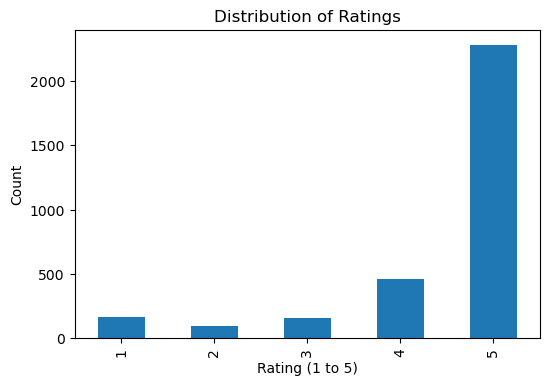

In [45]:
plt.figure(figsize=(6,4))
rating_counts.plot(kind='bar')
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Count")
plt.show()

In [50]:
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else np.nan))
df = df.dropna(subset=['sentiment'])
df['sentiment'] = df['sentiment'].astype(int)

print("After mapping to binary sentiment:", df['sentiment'].value_counts())


After mapping to binary sentiment: sentiment
1    2741
0     256
Name: count, dtype: int64


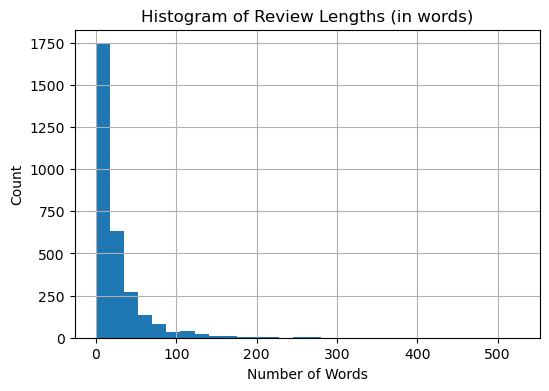

(      rating       date                     variation verified_reviews  \
 2187       5  30-Jul-18  Configuration: Fire TV Stick                    
 2772       4  30-Jul-18                    Black  Dot                    
 2775       5  30-Jul-18                    Black  Dot                    
 2244       2  30-Jul-18  Configuration: Fire TV Stick                    
 1385       5  17-Jul-18                   Black  Spot                    
 
       feedback  sentiment  review_len  
 2187         1          1           0  
 2772         1          1           0  
 2775         1          1           0  
 2244         0          0           0  
 1385         1          1           0  ,
       rating       date                     variation  \
 2016       5  20-Jul-18                   Black  Plus   
 1322       5  21-Jul-18                   Black  Spot   
 1996       2  21-Jul-18                   Black  Plus   
 2234       5  30-Jul-18  Configuration: Fire TV Stick   
 1605      

In [51]:
df['review_len'] = df['verified_reviews'].apply(lambda txt: len(txt.split()))
plt.figure(figsize=(6,4))
df['review_len'].hist(bins=30)
plt.title("Histogram of Review Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

# Inspect very short or very long reviews
df.sort_values('review_len').head(5), df.sort_values('review_len', ascending=False).head(5)
